<a href="https://colab.research.google.com/github/alldominguez/Bioinformatics_UB/blob/main/sesion_practica_exposoma-bioinformatics-UB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesión práctica Exposoma - Bioinformatics UB.**  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/logo_UB.png?raw=1" alt="ISGlobal logo" width="300"/>  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>

The exposome, described as "the totality of human environmental exposures from conception onward," recognizes that individuals are simultaneously exposed to multiple different environmental factors, adopting a holistic approach to discovering the etiologies of disease. The main advantage of the exposome approach over more traditional "one exposure, one disease or health outcome" models is that it provides a framework for studying multiple environmental risks (urban, chemical, lifestyle, social, etc.) and their combined effects.

The **objective** of this session is to provide an **introduction to the different statistical approaches** necessary to answer the main questions of **exposome research**. Therefore, this session will cover:

**1. Descriptive Analysis:** The first part of the session will focus on the concept of descriptive analysis in exposomes, which allows for the initial drawing of conclusions from the data. Among other objectives, descriptive analysis aims to identify potential outliers, confounding factors, or variables that require transformations prior to analysis. Furthermore, descriptive analysis allows for a preliminary comparison of the experimental groups under study, the examination of correlation patterns between exposure factors, and the identification of clustering phenomena in the data (both at the individual and characteristic levels). These are all essential steps for selecting the most appropriate subsequent statistical approach.

Some of the topics we will cover in this section include:

* **Visualization of the distribution and concentration of exposome variables.**
* **Correlation between exposures.**
* **Principal Component Analysis (PCA) applied to exposome variables.**

**2. Association Analysis:** Association analysis aims to identify potential environmental exposure factors associated with various health parameters. This section of the session will therefore present different holistic analytical approaches focused on studying the effects of multiple exposure factors and their mixtures on health. This primarily includes models such as ExWAS (Exposome-Wide Association Analysis), and others for studying interactions or nonlinear phenomena (e.g., Bayesian Kernel Machine Regression). An introduction to clustering methods or exposure mixtures (e.g., Weighted Quantile Sum Regression) will also be presented. During this discussion, key concepts in exposome analysis, such as feature selection and multiple testing correction, will be introduced.

Some of the topics we will cover in this section include:

* **Exposure-Wide Association Analysis (ExWas)**
* **Methods for variable selection (Stepwise, Elastic Net, DSA)**

# **Reminder: Introduction to Notebook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

Within this notebook, you will be guided step-by-step from loading a dataset to performing a descriptive analysis of its contents.

The Jupyter (Python) notebook is an approach that combines text blocks (like this one) with code blocks or cells. The great advantage of this type of cell is its interactivity, as it can be executed to check the results directly within the cells. Very important: the order of the instructions is crucial, so each cell in this notebook must be executed sequentially. If you omit any, the program may throw an error, so you should start from the beginning if you have any doubts.

Before anything else:

It is **very important** that you select ***Open in draft mode*** at the top left. Otherwise, no code blocks will be allowed to run for security reasons. When you run the first block, the following message will appear: **Warning: This notebook was not created by Google.**. Don't worry, you should trust the contents of the notebook and click "Run anyway".

Click the "play" button to the left of each code cell. Lines of code beginning with a hashtag (#) are comments and do not affect program execution.

You can also click on each cell and press Ctrl+Enter (Cmd+Enter on a Mac).

Each time you run a block, you'll see the output directly below it. The information is usually related to the last instruction, along with all the `print()` statements in the code.

## **INDEX**
1. [Installing the R environment and its libraries for exposome analysis](#library-installation)
2. [Loading the data](#load-data)
3. [Descriptive analysis of the exposome](#descriptive)
4. [Association analysis of the exposome](#association)
  

## **1. Installation of the R environment and libraries for exposome analysis** <a name="installation-libraries"></a>

Next, we install/load the libraries needed for this session. In the context of exposome analysis, R libraries offer a much more convenient way to process, manipulate, and analyze data. Some of these libraries are: `tidyverse`, `skimr`, `rexposome`, `bkmr`,  `gWQS`.   
  
The installation of R in our Google Colab environment will be performed in the following code block. It's important to remember that all library installations in the Google Colab environment will only remain active for a few hours, after which they are removed. Therefore, you will need to run the library installation code in this section again whenever you need to run `notebook` after this time.

**Note:** We recommend installing the libraries **30 minutes** before the start of the session❗❗❗


In [ ]:
# First we check the version of R we have
#R.Version()

**Installing/Loading Libraries for the Session**

We will install/load the necessary libraries for the practical session. For this, we will use the `pacman` package. This package is an administration tool that combines functionalities from various functions `install.packages` + `library`.








In [ ]:
# Estimated execution time: approximately 3 seconds.

install.packages("pacman") # It allows us to install/load packages simultaneously.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



We will install `BiocManager` and `rexposome` (these two packages are essential for exposome analysis), using the following code since it sometimes has compatibility problems with the R version (the process takes around **20 minutes**, so it is recommended to install it during the theoretical session.

In [ ]:
# Estimated execution time: approximately 23 minutes.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c('Biobase', 'mice', 'MultiDataSet', 'lsr', 'FactoMineR',
	'stringr', 'circlize', 'corrplot', 'ggplot2', 'reshape2', 'pryr',
	'scales', 'imputeLCMD', 'scatterplot3d', 'glmnet', 'gridExtra',
	'grid', 'Hmisc', 'gplots', 'gtools', 'S4Vectors'
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

In [ ]:
# Estimated execution time: 2 minutes approx.
# We installed Rexposome (Rexposome installation takes a little while depending on your internet connection)
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'rexposome' from a github remote, the SHA1 (0bb431c5) has not changed since last install.
  Use `force = TRUE` to force installation



In [ ]:
#For those who have an older version of R (in the case of using Rstudio desktop)
#devtools::install_github("isglobal-brge/rexposome", ref="R-3.0")

In [ ]:
# Estimated execution time: 8 minutes approx.
# We add all the libraries we need to use (if the package is already installed, it will automatically load if it's in the pacman::p_load() function)
pacman::p_load(tidyverse, corrplot, RColorBrewer, skimr, ggridges, rexposome,
 MASS, caret, glmnet, partDSA)

In [ ]:
#if (!require("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("rexposome", force = TRUE)


## **2. Cargar los datos** <a name="cargar-datos"></a>

The following lines of code are needed to load the Exposome dataset into the R environment. For this practical session, we will use data from the HELIX exposome study. The HELIX study is a collaborative project involving six population-based longitudinal birth cohort studies from six European countries (France, Greece, Lithuania, Norway, Spain, and the United Kingdom).

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="500"/>


**Note:** The data provided in this introductory course were simulated using data from the HELIX subcohort. Details of the HELIX project and the origin of the collected data can be found in the following publication: https://bmjopen.bmj.com/content/8/9/e021311 y website: https://www.projecthelix.eu/es.

The **exposome data (n = 1301)** that we will use is contained in an Rdata file; the file contains the following files:

1. `phenotype` (outcomes)
2. `exposome` (exposiciones)
3. `covariates` (covariables)


The `exposome` database contains more than **200 exposures**.

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposures_helix.png?raw=1" alt="HELIX exposures" width="300"/>

The description of each variable (name, structure, variable type, transformation, ...) is detailed in the [codebook](https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/data/codebook.csv).




**1.-** We load the necessary data for the session

In [ ]:
# Option 1 (we load the databases as csv files)
phenotype <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/phenotype.csv"),  header = TRUE) # outcomes
exposome <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.csv"), header = TRUE) # exposiciones
covariates <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/covariates.csv"), header = TRUE) # covariables
codebook <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/codebook.csv")) # codebook

In [ ]:
# Option 2 (we load an RData file, this file contains the 3 datasets + the codebook)
load(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.RData")) # with this line we charge everything

In [ ]:
phenotype
exposome
covariates
codebook

,ID,e3_bw,hs_asthma,hs_zbmi_who,hs_correct_raven,hs_Gen_Tot,hs_bmi_c_cat
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,1,4100,0,0.30,18,84.0000,2
2,2,4158,0,0.41,25,39.0000,2
3,3,4110,1,3.33,13,40.0000,4
4,4,3270,0,-0.76,28,54.5000,2
5,5,3950,0,0.98,19,18.0000,2
6,6,2900,1,-0.08,19,4.0000,2
7,7,3350,0,0.04,34,21.1875,2
8,8,3580,1,-0.10,16,8.0000,2
9,9,3000,0,-1.78,35,19.0625,2


,ID,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,⋯,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.89671105,2.872304,25.94850,17.433798,2.530279,2.583284,2.612098,22.53583,20.850005,⋯,exposure,both,-5.629052,0.3458301,21.213987,135.99576,24.914911,-2.9759296,-0.5367134,0.2880726
2,2,0.89253797,2.980008,25.89774,18.470850,1.928600,2.652479,2.761064,14.07776,29.141274,⋯,no exposure,neither,-5.045588,0.3458301,22.649684,97.88442,27.905292,-2.9759296,1.0787497,3.1954784
3,3,0.77872299,3.056501,26.08735,18.711547,2.882591,2.591756,2.356163,46.85910,31.530981,⋯,no exposure,one,-4.204225,145.5727586,25.549436,127.53614,29.299706,-1.6044503,1.1887577,3.0239239
4,4,0.08905574,3.089157,14.99138,16.409771,1.390750,2.456717,2.403247,29.81744,25.232778,⋯,exposure,one,-3.088010,187.1200205,22.743850,114.86848,22.743850,2.7488186,3.6368129,3.8393351
5,5,0.60478093,3.848211,35.19730,14.889958,3.204449,3.499594,3.307663,29.81744,24.891465,⋯,no exposure,neither,-1.459250,158.4890394,29.872070,205.77478,14.131454,4.2621375,3.0278427,4.5727340
6,6,0.20045795,2.891142,19.76697,12.825988,3.537311,3.458832,3.443253,24.76304,22.893956,⋯,no exposure,neither,-2.722931,63.1132643,7.937005,150.94307,13.986892,2.7045022,3.6203667,3.8074699
7,7,0.49652571,3.373861,23.12116,19.425609,2.237178,2.044063,2.029703,24.01430,24.891465,⋯,no exposure,neither,-2.548100,30.2726349,7.937005,165.32919,15.095685,2.7089606,0.3371863,3.7164105
8,8,0.20515012,2.878540,19.68730,14.183917,3.082235,3.318016,3.367169,20.78633,23.188724,⋯,no exposure,neither,-4.383742,117.2477971,7.937005,153.93522,22.208216,2.7127035,3.5324524,3.8396766
9,9,0.15538213,3.365869,21.89084,18.900023,1.493143,1.930974,1.988530,21.19045,24.891465,⋯,no exposure,neither,-2.832079,51.7380022,8.962809,67.55812,8.962809,2.0083483,-6.9077553,1.8159404


,ID,h_cohort,e3_sex_None,e3_yearbir_None,h_mbmi_None,hs_wgtgain_None,e3_gac_None,h_age_None,h_edumc_None,h_native_None,h_parity_None,hs_child_age_None,hs_c_height_None,hs_c_weight_None
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,4,male,2008,25.51020,17,41.00000,28.00000,2,2,0,6.165640,1.220,23.4
2,2,4,male,2007,26.49151,18,41.00000,22.84155,3,2,1,6.992471,1.220,27.6
3,3,4,male,2008,30.11621,11,39.00000,34.23242,3,2,1,6.110883,1.280,37.5
4,4,2,female,2005,21.04805,21,39.28571,32.72553,1,2,1,10.138261,1.345,27.7
5,5,3,male,2005,22.15102,20,43.00000,20.86516,1,2,0,9.451175,1.370,34.0
6,6,1,female,2007,24.90358,30,38.85714,27.00000,3,2,0,6.384782,1.130,21.5
7,7,2,male,2003,27.51718,20,40.00000,39.60027,1,2,2,11.343030,1.315,29.8
8,8,1,female,2008,28.14870,20,40.57143,34.00000,2,0,0,6.338125,1.225,22.5
9,9,2,female,2004,23.02895,12,40.85714,30.38741,2,2,1,10.715948,1.510,24.3


,variable_name,domain,family,subfamily,period,location,period_postnatal,description,var_type,transformation,labels,labelsshort
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
h_abs_ratio_preg_Log,h_abs_ratio_preg_Log,Outdoor exposures,Air Pollution,PMAbsorbance,Pregnancy,Home,NA,abs value (extrapolated back in time using ratio method)duringpregnancy,numeric,Natural Logarithm,PMabs,PMabs
h_no2_ratio_preg_Log,h_no2_ratio_preg_Log,Outdoor exposures,Air Pollution,NO2,Pregnancy,Home,NA,no2 value (extrapolated back in time using ratio method)during pregnancy,numeric,Natural Logarithm,NO2,NO2
h_pm10_ratio_preg_None,h_pm10_ratio_preg_None,Outdoor exposures,Air Pollution,PM10,Pregnancy,Home,NA,pm10 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM10,PM10
h_pm25_ratio_preg_None,h_pm25_ratio_preg_None,Outdoor exposures,Air Pollution,PM2.5,Pregnancy,Home,NA,pm25 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM2.5,PM2.5
hs_no2_dy_hs_h_Log,hs_no2_dy_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Day before examination,no2 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,Natural Logarithm,NO2(day),NO2(day)
hs_no2_wk_hs_h_Log,hs_no2_wk_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Week before examination,no2 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,Natural Logarithm,NO2(week),NO2(week)
hs_no2_yr_hs_h_Log,hs_no2_yr_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Year before examination,no2 value (extrapolated back in time using ratio method)one year before hs test at home,numeric,Natural Logarithm,NO2(year),NO2(year)
hs_pm10_dy_hs_h_None,hs_pm10_dy_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Day before examination,pm10 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,None,PM10(day),PM10(day)
hs_pm10_wk_hs_h_None,hs_pm10_wk_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Week before examination,pm10 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,None,PM10(week),PM10(week)


** *texto en cursiva*2.-** We reviewed the structure and dimension of the data

In [ ]:
dplyr::glimpse(phenotype) # 1301 observations

Rows: 1,301
Columns: 7
$ ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ e3_bw            <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350, 3580, 3000,…
$ hs_asthma        <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,…
$ hs_zbmi_who      <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.04, -0.10, -1…
$ hs_correct_raven <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 18, 24, 30, 3…
$ hs_Gen_Tot       <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.0000, 4.0000, …
$ hs_bmi_c_cat     <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 2,…


In [ ]:
dplyr::glimpse(exposome) # 1301 observations

Rows: 1,301
Columns: 223
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_h_Log           <dbl> 2.583284, 2.652479, 2.591756, 2.456717, 3…
$ hs_no2_yr_hs_h_Log           <dbl> 2.612098, 2.761064, 2.356163, 2.403247, 3…
$ hs_pm10_dy_hs_h_None         <dbl> 22.53583, 14.07776, 46.85910, 29.81744, 2…
$ hs_pm10_wk_hs_h_None         <dbl> 20.850005, 29.141274, 31.530981, 25.23277…
$ hs_pm10_yr_hs_h_None         <dbl> 31.39907, 31.25053, 27.51600, 23.96526, 2…
$ hs_pm25_dy_hs_h_None         <dbl> 16.950474, 11.155481, 28.454911, 4.624601…
$ hs_pm25_wk_hs

In [ ]:
dplyr::glimpse(covariates) # 1301 observations

Rows: 1,301
Columns: 14
$ ID                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ h_cohort          <fct> 4, 4, 4, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 4, 4, 4, 4…
$ e3_sex_None       <fct> male, male, male, female, male, female, male, female…
$ e3_yearbir_None   <fct> 2008, 2007, 2008, 2005, 2005, 2007, 2003, 2008, 2004…
$ h_mbmi_None       <dbl> 25.51020, 26.49151, 30.11621, 21.04805, 22.15102, 24…
$ hs_wgtgain_None   <dbl> 17, 18, 11, 21, 20, 30, 20, 20, 12, 9, 10, 18, 5, 20…
$ e3_gac_None       <dbl> 41.00000, 41.00000, 39.00000, 39.28571, 43.00000, 38…
$ h_age_None        <dbl> 28.00000, 22.84155, 34.23242, 32.72553, 20.86516, 27…
$ h_edumc_None      <fct> 2, 3, 3, 1, 1, 3, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2…
$ h_native_None     <fct> 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2…
$ h_parity_None     <fct> 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1…
$ hs_child_age_None <dbl> 6.165640, 6.992471, 6.110883, 10.138261, 9.451175, 6…
$ hs_c_height_No

In [ ]:
dplyr::glimpse(codebook) # This file contains the codebook with the description of each variable

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


* If we upload the CSV files, we have to take an additional step.

In [ ]:
#rownames(codebook) <- codebook[, 2]
#codebook <- codebook[, -1]

In [ ]:
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


**3.-** We do a quick summary of our data to check if it was uploaded correctly.

In [ ]:
skimr::skim(phenotype)

── Data Summary ────────────────────────
                           Values   
Name                       phenotype
Number of rows             1301     
Number of columns          7        
_______________________             
Column type frequency:              
  factor                   1        
  numeric                  6        
________________________            
Group variables            None     

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 hs_bmi_c_cat          0             1 FALSE          4
  top_counts                   
1 2: 904, 3: 253, 4: 131, 1: 13

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate     mean      sd      p0    p25
1 ID                       0             1  651     376.       1     326  
2 e3_bw                    0             1 3389.    510.    1100    3080  
3 hs_asthma           

ERROR: ignored

In [ ]:
skimr::skim(exposome)

── Data Summary ────────────────────────
                           Values  
Name                       exposome
Number of rows             1301    
Number of columns          223     
_______________________            
Column type frequency:             
  factor                   53      
  numeric                  170     
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate ordered n_unique
 1 e3_alcpreg_yn_None                  0             1 FALSE          2
 2 h_bfdur_Ter                         0             1 FALSE          3
 3 h_cereal_preg_Ter                   0             1 FALSE          3
 4 h_dairy_preg_Ter                    0             1 FALSE          3
 5 h_fastfood_preg_Ter                 0             1 FALSE          3
 6 h_fish_preg_Ter                     0             1 FALSE          3
 7 h_folic_t1

ERROR: ignored

In [ ]:
skimr::skim(covariates)

── Data Summary ────────────────────────
                           Values    
Name                       covariates
Number of rows             1301      
Number of columns          14        
_______________________              
Column type frequency:               
  factor                   6         
  numeric                  8         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate ordered n_unique
1 h_cohort                0             1 FALSE          6
2 e3_sex_None             0             1 FALSE          2
3 e3_yearbir_None         0             1 FALSE          7
4 h_edumc_None            0             1 FALSE          3
5 h_native_None           0             1 FALSE          3
6 h_parity_None           0             1 FALSE          3
  top_counts                            
1 5: 272, 3: 224, 4: 207, 1: 202        
2 

ERROR: ignored

We will use the `rexposome::loadExposome` function to create a single dataset (`ExposomeSet`) from the `data.frames` we initially loaded. First, we will sort the data into the appropriate format for our analysis.



In [ ]:
levels(codebook$family)

[1] "Air Pollution"                             
 [2] "Built environment"                         
 [3] "Covariates"                                
 [4] "Indoor air"                                
 [5] "Lifestyle"                                 
 [6] "Metals"                                    
 [7] "Meteorological"                            
 [8] "Natural Spaces"                            
 [9] "Noise"                                     
[10] "Organochlorines"                           
[11] "Organophosphate pesticides"                
[12] "Per- and polyfluoroalkyl substances (PFAS)"
[13] "Phenols"                                   
[14] "Phenotype"                                 
[15] "Phthalates"                                
[16] "Polybrominated diphenyl ethers (PBDE)"     
[17] "Social and economic capital"               
[18] "Tobacco Smoke"                             
[19] "Traffic"                                   
[20] "Water DBPs"

In [ ]:
# We create a subset of the variables for illustrative purposes (you can try with other families)
#xpo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                 #codebook$family == "Metals" |
                                                 #codebook$family == "Chemicals" |
                                                 #codebook$family == "Air Pollution" |
                                                 #codebook$family == "Indoor air" |
                                                 #codebook$family == "Built environment") &
                                                 #codebook$period == "Postnatal"]) cambiar por "Pregnancy"
#expo.list

In [ ]:
# we can try another subset
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

[1] "hs_accesslines300_h_dic0"   "hs_accesspoints300_h_Log"  
 [3] "hs_builtdens300_h_Sqrt"     "hs_connind300_h_Log"       
 [5] "hs_fdensity300_h_Log"       "hs_landuseshan300_h_None"  
 [7] "hs_popdens_h_Sqrt"          "hs_walkability_mean_h_None"
 [9] "hs_accesslines300_s_dic0"   "hs_accesspoints300_s_Log"  
[11] "hs_builtdens300_s_Sqrt"     "hs_connind300_s_Log"       
[13] "hs_fdensity300_s_Log"       "hs_landuseshan300_s_None"  
[15] "hs_popdens_s_Sqrt"          "hs_as_c_Log2"              
[17] "hs_cd_c_Log2"               "hs_co_c_Log2"              
[19] "hs_cs_c_Log2"               "hs_cu_c_Log2"              
[21] "hs_hg_c_Log2"               "hs_mn_c_Log2"              
[23] "hs_mo_c_Log2"               "hs_pb_c_Log2"              
[25] "hs_tl_cdich_None"           "hs_dde_cadj_Log2"          
[27] "hs_ddt_cadj_Log2"           "hs_hcb_cadj_Log2"          
[29] "hs_pcb118_cadj_Log2"        "hs_pcb138_cadj_Log2"       
[31] "hs_pcb153_cadj_Log2"        "hs_pcb170_cadj_Log2"       
[33] "hs_pcb180_cadj_Log2"        "hs_sumPCBs5_cadj_Log2"

In [ ]:
# We can exclude some exposure variables in which we are not interested.
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [ ]:
# We select specific columns (variables) from the families we selected in the previous step and add the ID variable
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
# We scaled the continuous variables using
index.cont <- c(3:9,11:ncol(expo2))
for (i in index.cont) {
  expo2[,i] <- expo2[,i]/IQR(expo2[,i],na.rm=T)
}

In [ ]:
# We reviewed the selected variables
dplyr::glimpse(expo2)

Rows: 1,301
Columns: 33
$ ID                         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ hs_accesslines300_h_dic0   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_h_Log   <dbl> 1.0410206, 1.7236128, 0.3585836, 2.8483688,…
$ hs_builtdens300_h_Sqrt     <dbl> 2.5614489, 2.4102779, 2.3607646, 3.0238301,…
$ hs_connind300_h_Log        <dbl> 4.761417, 3.915685, 3.002645, 5.709277, 5.0…
$ hs_fdensity300_h_Log       <dbl> 4.935381, 4.935381, 4.935381, 6.721231, 5.2…
$ hs_landuseshan300_h_None   <dbl> 1.9739687, 1.7899665, 2.6763931, 2.5376134,…
$ hs_popdens_h_Sqrt          <dbl> 1.54657294, 0.18646883, 0.18646883, 1.21078…
$ hs_walkability_mean_h_None <dbl> 3.75, 2.00, 2.50, 5.25, 3.00, 3.75, 3.00, 3…
$ hs_accesslines300_s_dic0   <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_s_Log   <dbl> 0.3585836, 1.3583974, 1.3583974, 2.0410206,…
$ hs_builtdens300_s_Sqrt     <dbl> 2.3222513, 2.3141441, 2.2101754, 2.4506088,…
$ hs_connind300_

In [ ]:
# list of exposure variables
codebook[expo.list,]$labels

[1] Access_ lines_home     Access_stops_home      Building_home         
 [4] Connectivity           Facility_dens          Land use              
 [7] Population             Walkability            Access_ lines_school  
[10] Access_stops_school    Building_school_school Connectivity_school   
[13] Facility_dens_school   Land use_school        Population_school     
[16] As                     Cd                     Co                    
[19] Cs                     Cu                     Hg                    
[22] Mn                     Mo                     Pb                    
[25] DDE                    DDT                    HCB                   
[28] PCB 118                PCB 138                PCB 153               
[31] PCB 170                PCB 180               
178 Levels: Access_ lines Access_ lines_home ... Yogurt

* We combine data from the files `phenotype` y `covariates`

In [ ]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # We select the 4th column of the phenotype dataframe and call it hs_zbmi_whO
             covariates[ ,2:13])  # We selected from columns 2 to 13 of the covariates dataframe

# then we combine
data <- data.frame(expo2, dat)

In [ ]:
# We reviewed the generated database
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


In [ ]:
str(data)

'data.frame':	1301 obs. of  46 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hs_accesslines300_h_dic0  : num  0 0 0 1 1 0 0 0 0 0 ...
 $ hs_accesspoints300_h_Log  : num  1.041 1.724 0.359 2.848 2.25 ...
 $ hs_builtdens300_h_Sqrt    : num  2.56 2.41 2.36 3.02 1.32 ...
 $ hs_connind300_h_Log       : num  4.76 3.92 3 5.71 5.03 ...
 $ hs_fdensity300_h_Log      : num  4.94 4.94 4.94 6.72 5.27 ...
 $ hs_landuseshan300_h_None  : num  1.97 1.79 2.68 2.54 2.85 ...
 $ hs_popdens_h_Sqrt         : num  1.547 0.186 0.186 1.211 0.083 ...
 $ hs_walkability_mean_h_None: num  3.75 2 2.5 5.25 3 3.75 3 3.25 2.75 5.25 ...
 $ hs_accesslines300_s_dic0  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ hs_accesspoints300_s_Log  : num  0.359 1.358 1.358 2.041 1.358 ...
 $ hs_builtdens300_s_Sqrt    : num  2.322 2.314 2.21 2.451 0.373 ...
 $ hs_connind300_s_Log       : num  2.83 4.15 4.76 6.76 5.66 ...
 $ hs_fdensity300_s_Log      : num  4.46 4.46 4.46 5.36 4.76 ...
 $ hs_landuseshan300_s_None  : n

Now we will create our `ExposomeSet` object by combining the three files we worked with in the previous lines. This dataset is composed of:

* **3 exposure families** (built environment, metals, organochlorines), totaling **32 exposures**. [continuous variables]
* **1 outcome** (z-score for BMI) [continuous variable]
* **1 exposure window** [postnatal period]



In [ ]:
exp <- rexposome::loadExposome(
  exposures = expo2[expo.list],
  description = codebook[expo.list,],
  phenotype = dat,
  description.famCol = "family"
  )

In [ ]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x5d26c7f32880> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


We can also join our databases using the `dplyr::inner_join` function; this object, called `exp_all`, will be a `data.frame` and not an `ExposomeSet` object, so we won't be able to use all the functionalities of the `rexposome` package.

In [ ]:
# With this line we can join all the databases using ID as the key variable
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [ ]:
dplyr::glimpse(exp_all) # 1,301 observations y 242 variables

Rows: 1,301
Columns: 242
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ e3_bw                        <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350,…
$ hs_asthma                    <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,…
$ hs_zbmi_who                  <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.0…
$ hs_correct_raven             <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 1…
$ hs_Gen_Tot                   <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.00…
$ hs_bmi_c_cat                 <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2,…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_

## **3.- Descriptive analysis of the Exposome** <a name="descriptive"></a>

For the descriptive analysis of the exposome, we will use the `rexposome` library. This library contains various functions designed to explore and describe exposome data (missing data, distribution, correlation). Some of its functions are: `normalityTest`, `plotMissing`, `plotHistogram`, `plotFamily`, `correlation`, and `plotCorrelation`.

In [ ]:
# We review the database we will use (it needs to be an ExposomeSet object)
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x5d4538d0b8d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

We will use the `rexposome::normaltyTest` function to evaluate the exposome variables that follow a normal distribution.

In [ ]:
nm <- rexposome::normalityTest(exp)
table(nm$normality)


FALSE  TRUE 
   29     1 

In [ ]:
# We reviewed all the variables that do not have a normal distribution.
nm$exposure[!nm$normality]

[1] "hs_pcb170_cadj_Log2"        "hs_hcb_cadj_Log2"          
 [3] "hs_mo_c_Log2"               "hs_pcb138_cadj_Log2"       
 [5] "hs_ddt_cadj_Log2"           "hs_fdensity300_h_Log"      
 [7] "hs_pcb180_cadj_Log2"        "hs_as_c_Log2"              
 [9] "hs_accesspoints300_h_Log"   "hs_cd_c_Log2"              
[11] "hs_fdensity300_s_Log"       "hs_accesspoints300_s_Log"  
[13] "hs_connind300_s_Log"        "hs_popdens_h_Sqrt"         
[15] "hs_co_c_Log2"               "hs_pcb118_cadj_Log2"       
[17] "hs_connind300_h_Log"        "hs_dde_cadj_Log2"          
[19] "hs_hg_c_Log2"               "hs_popdens_s_Sqrt"         
[21] "hs_builtdens300_s_Sqrt"     "hs_walkability_mean_h_None"
[23] "hs_cu_c_Log2"               "hs_landuseshan300_s_None"  
[25] "hs_pb_c_Log2"               "hs_builtdens300_h_Sqrt"    
[27] "hs_landuseshan300_h_None"   "hs_pcb153_cadj_Log2"       
[29] "hs_cs_c_Log2"

### **3.1.- Visualization of the distribution and concentration of Exposome variables**

In [ ]:
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x5d4538d0b8d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

* **Histograms**

Using the `plotHistogram` function, we reviewed the distribution of categorical and continuous variables in our database. The histograms show the distribution of each category.



Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rexposome package.
  Please report the issue to the authors.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


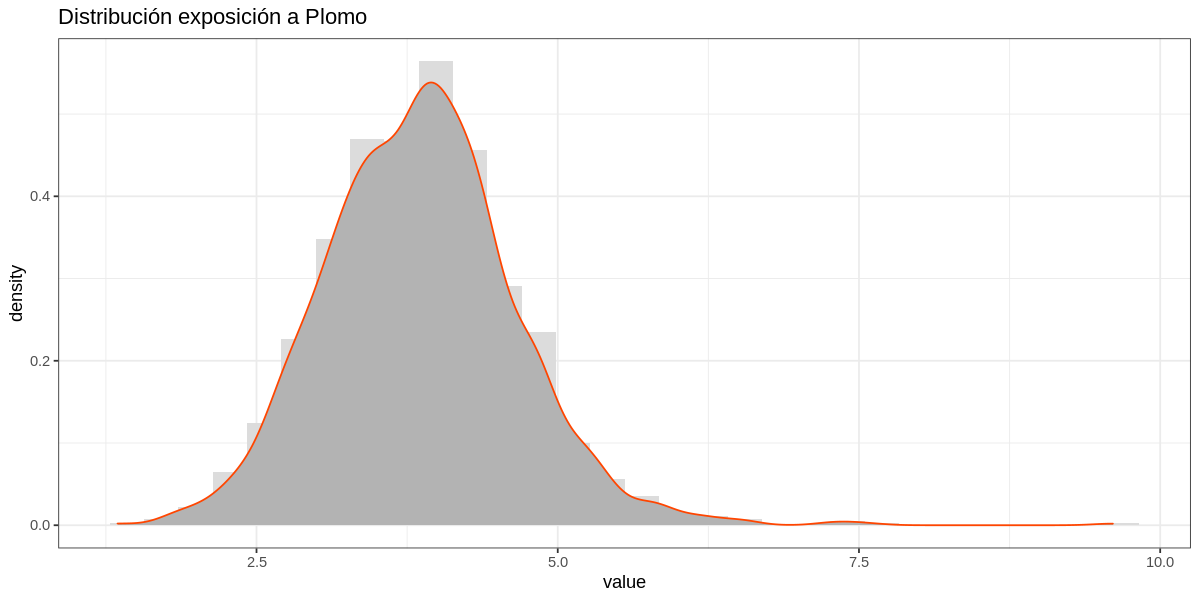

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


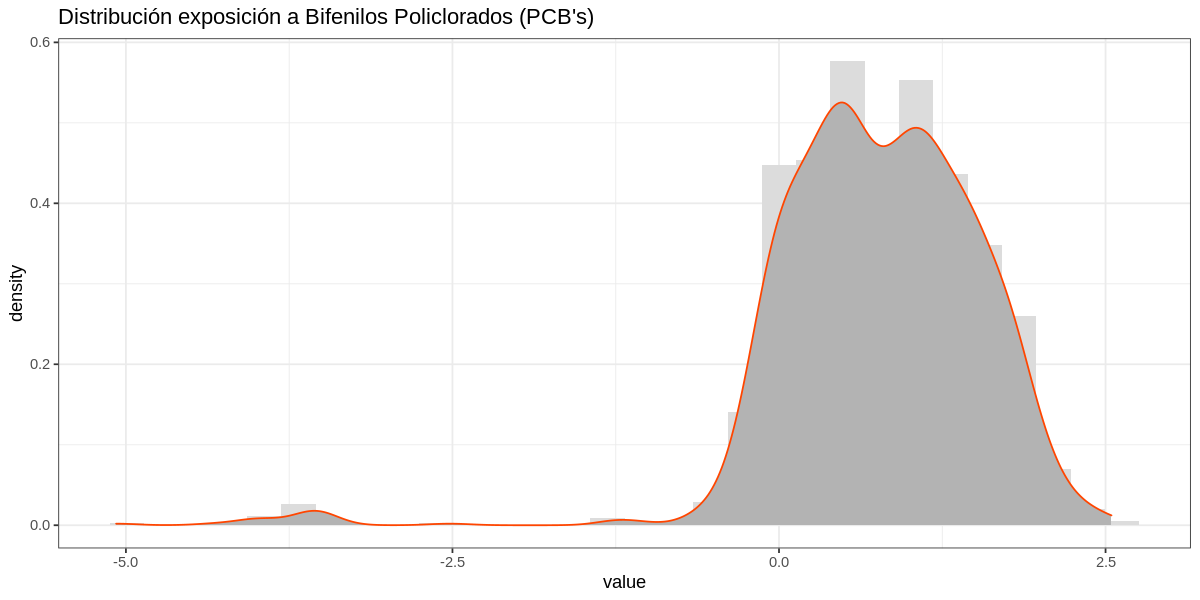

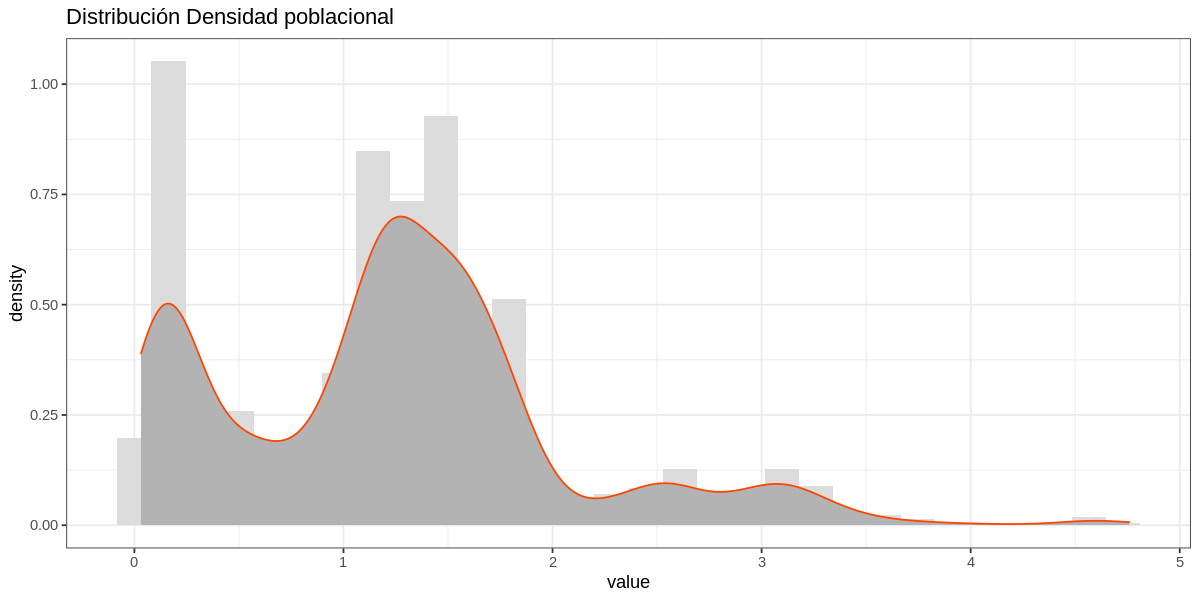

In [ ]:
rexposome::plotHistogram(exp, select = "hs_pb_c_Log2") + ggtitle("Distribución exposición a Plomo")  # Histograma pb
rexposome::plotHistogram(exp, select = "hs_pcb180_cadj_Log2") + ggtitle("Distribución exposición a Bifenilos Policlorados (PCB's)") # Histograma pcb180
rexposome::plotHistogram(exp, select = "hs_popdens_h_Sqrt") + ggtitle("Distribución Densidad poblacional") # Histograma densidad poblacional

* **Boxplots**

Using the `plotFamily` function, we can describe an exposure by family and stratify by group. Below are some examples (you can try it with other families).

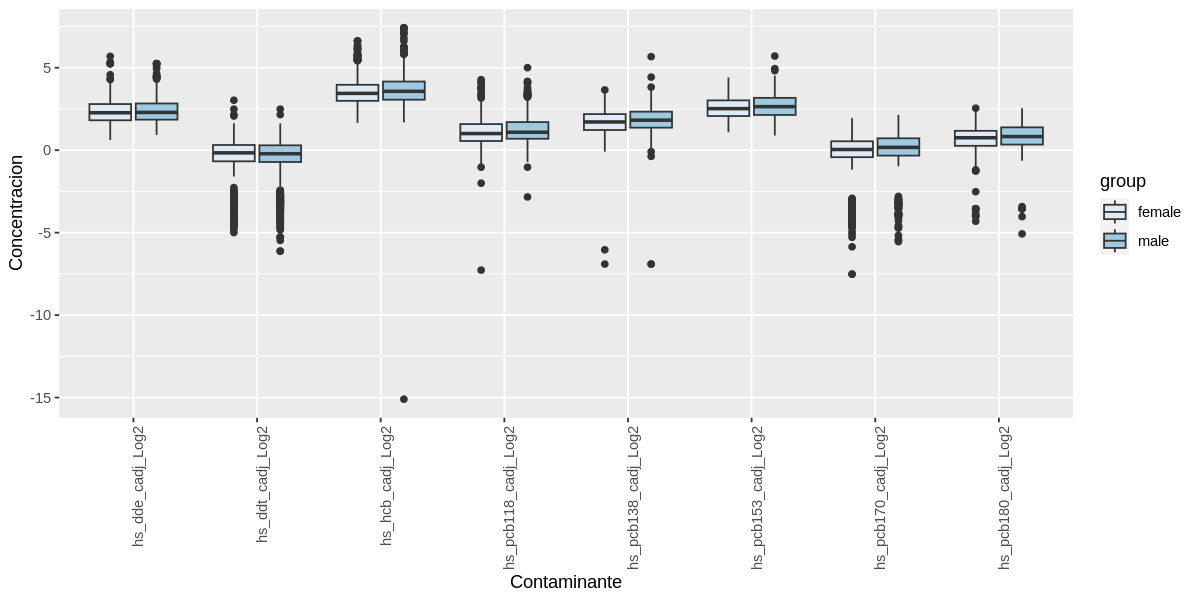

In [ ]:
# Organochlorine pollutants stratified by sex
rexposome::plotFamily(exp, family = "Organochlorines", group = "e3_sex_None") +
   xlab('Contaminante') +
   ylab('Concentracion')

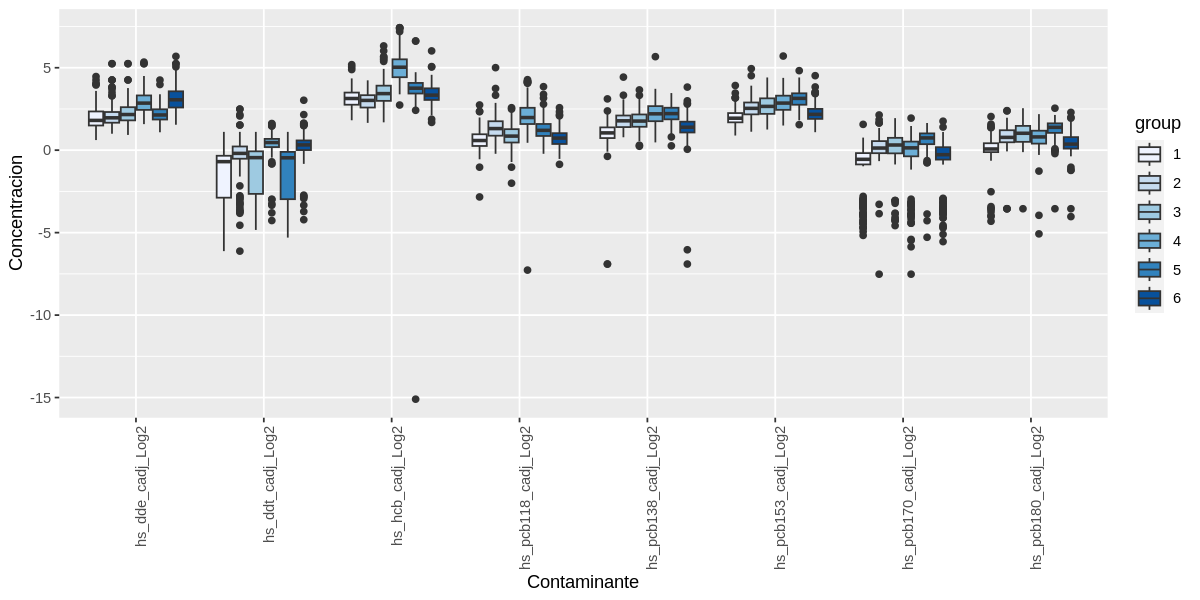

In [ ]:
# Organochlorine Contaminants** stratified by Cohort
rexposome::plotFamily(exp, family = "Organochlorines", group = "h_cohort") +
                      xlab('Contaminante') +
                      ylab('Concentracion')

In [ ]:
# Indoor air pollution stratified by cohort
#rexposome::plotFamily(exp, family = "Indoor air", group = "h_cohort")

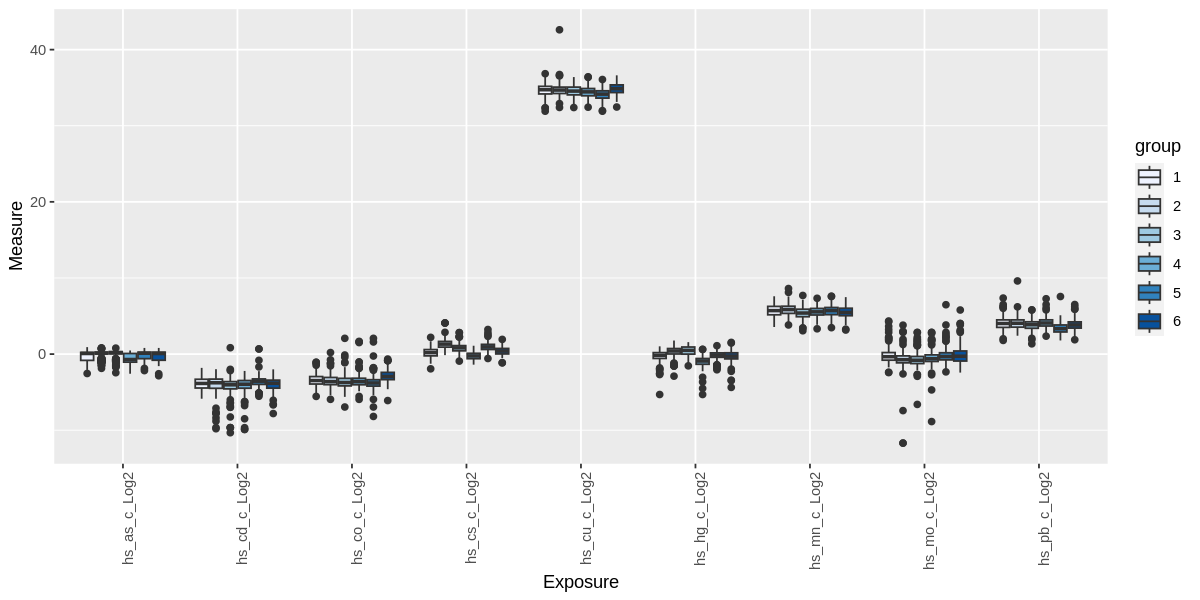

In [ ]:
# Metals stratified by Cohort
rexposome::plotFamily(exp, family = "Metals", group = "h_cohort")

### **3.2.- Correlation between exposures**

The correlation between variables is an important factor to consider when performing exposome analysis. To examine the intrafamilial and interfamilial correlation of different exposures, we will use the function `rexposome::correlation`.

In [ ]:
exp_cor <- rexposome::correlation(exp, use = "pairwise.complete.obs", method.cor = "spearman") # We can use Pearson as a correlation method

In [ ]:
extract(exp_cor)[1:4, 1:4]

,hs_accesslines300_h_dic0,hs_accesslines300_s_dic0,hs_accesspoints300_h_Log,hs_accesspoints300_s_Log
hs_accesslines300_h_dic0,0.9974536,0.8710063,0.2994728,0.3298710
hs_accesslines300_s_dic0,0.8710063,0.9974857,0.2708063,0.3297577
hs_accesspoints300_h_Log,0.2994728,0.2708063,1.0000000,0.6331554
hs_accesspoints300_s_Log,0.3298710,0.3297577,0.6331554,1.0000000


We can visualize the correlation of all exposures in the exposome (of our dataset) using two types of graphs with the `rexposome::plotCorrelation` function. Changing the `type` argument to `circos` or `matrix` gives us a different graph.

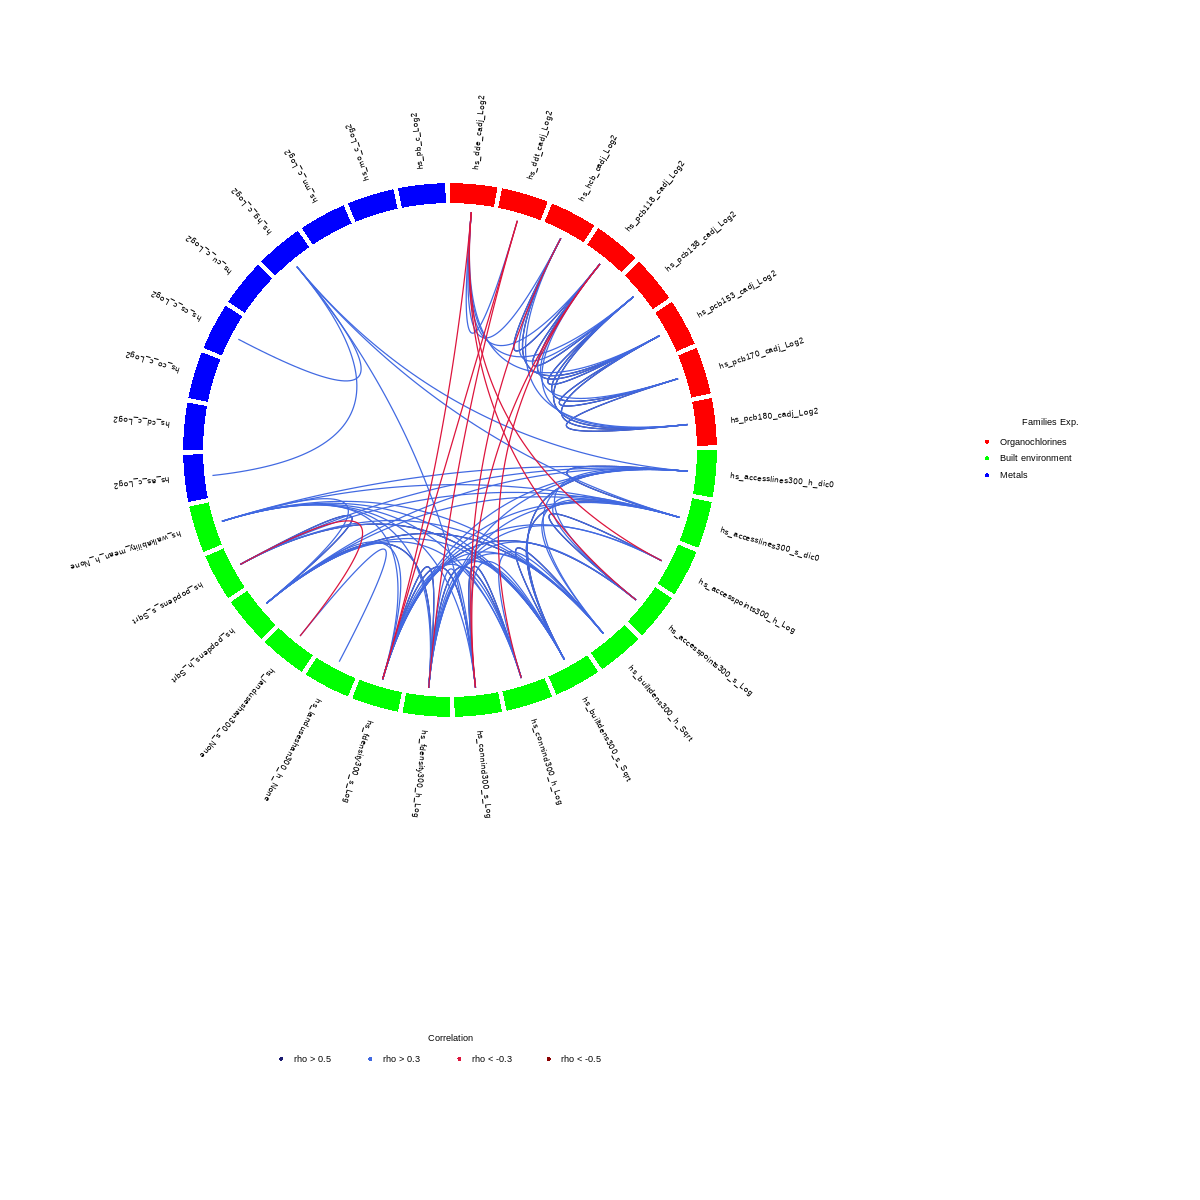

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
rexposome::plotCorrelation(exp_cor, type = "circos")

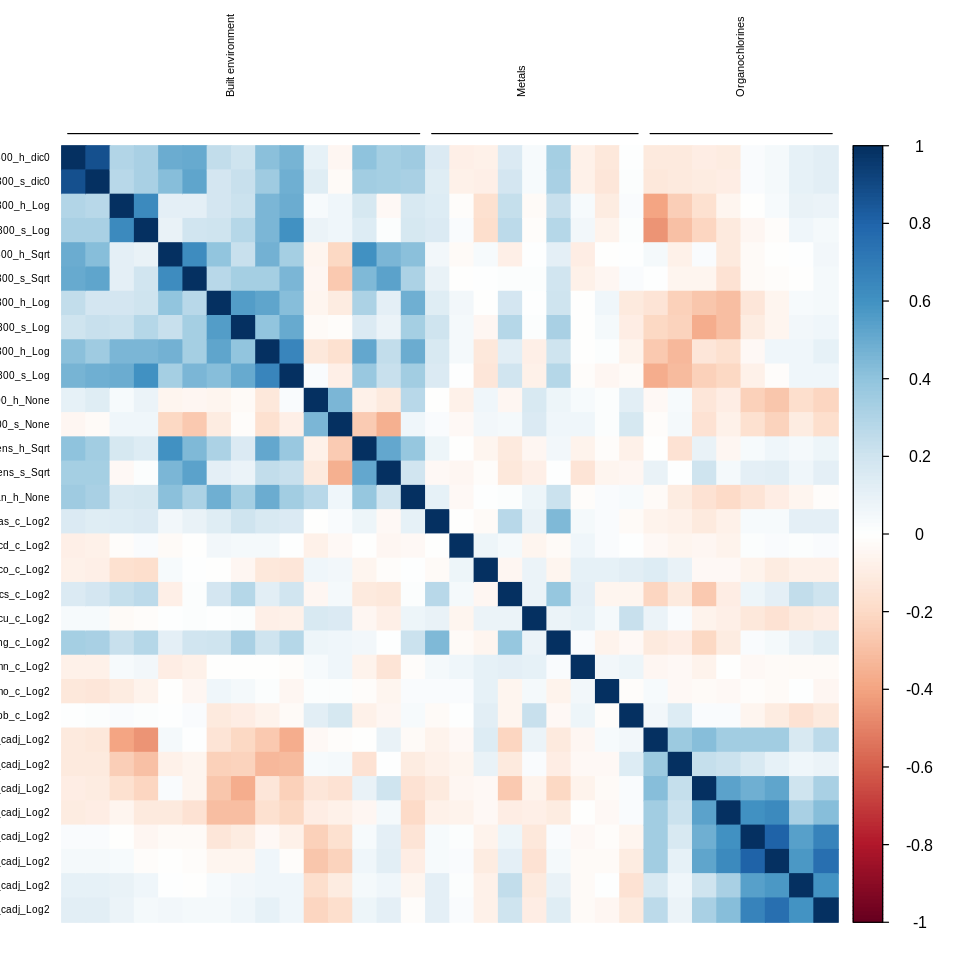

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
rexposome::plotCorrelation(exp_cor, type = "matrix")


### **3.3.- Principal Component Analysis (PCA)**

PCA is an unsupervised machine learning algorithm used for exploratory and dimensionality reduction analysis. To apply this analysis, exposures must be standardized. The `rexposome` package includes the `rexposome::standardize` function, which prepares the data for PCA application using the `rexposome::pca` function. After applying PCA, the results can be visualized using the `rexposome::plotPCA` function.

In [ ]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x5d4538d0b8d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


In [ ]:
# We standardize the exposure variables of our object exp
exp_std <- rexposome::standardize(exp, method = "normal")
exp_std

Warning message in rexposome::standardize(exp, method = "normal"):
“Given categorical exposures.”
Warning message in rexposome::standardize(exp, method = "normal"):
“Categorical exposures will not be standardized.”


Object of class 'ExposomeSet' (storageMode: environment)
 . exposures description:
    . categorical:  2 
    . continuous:  30 
 . exposures transformation:
    . categorical: 0 
    . transformed: 0 
    . standardized: 30 
    . imputed: 0 
 . assayData: 32 exposures 1301 individuals
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . individuals: 1, ..., 998 
 . phenoData: 1301 individuals 13 phenotypes
    . individuals: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
# We apply PCA to our new standardized object exp_std
exp_pca <- rexposome::pca(exp_std)
exp_pca

Object of class 'ExposomePCA' (storageMode: environment)
 . num. prin. components: 10 
 . assayData: 32 exposures 1301 samples
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . samples: 1, ..., 998 
 . phenoData: 1301 samples 13 phenotypes
    . samples: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 

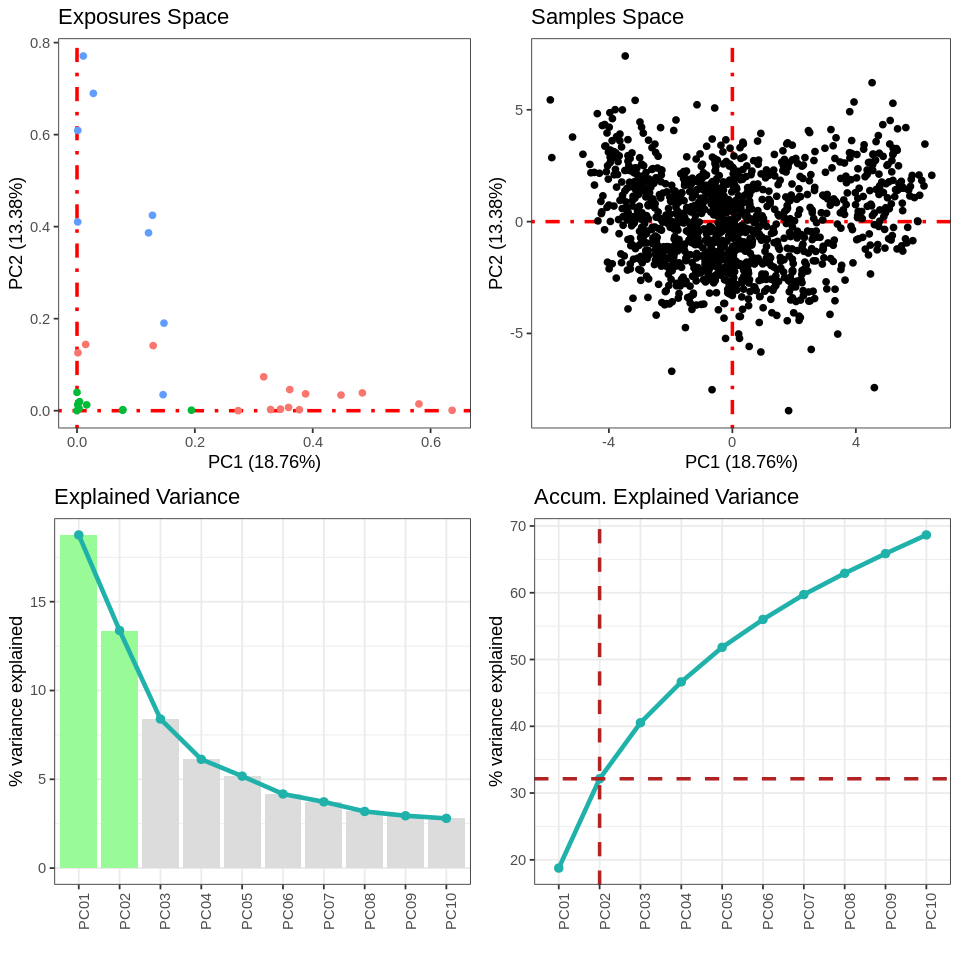

In [ ]:
# We visualize the PCA results
rexposome::plotPCA(exp_pca, set = "all")

***PCA Interpretation***

* **Exposures Space:** This graph represents the variability among different exposures (i.e., input characteristics or variables). Each point in this space corresponds to a specific exposure. The position of each point on the PC1 and PC2 coordinates indicates how much of that characteristic's variability is captured in those two principal components.

* **Samples Space:** This graph represents the variability between different samples or subjects. Each point represents an observation (individuals in our example), and its position on the PC1 and PC2 coordinates indicates how much of the total variability of that sample is described by those two principal components.

* **Explained Variance:** This bar chart shows the percentage of total variance in the dataset that is explained by each individual principal component. The first component (PC1) typically explains the most variability, followed by the second (PC2), and so on. The height of each bar indicates how much variance each component explains.

* **Accum. Explained Variance:** This chart indicates how much total variability has been captured after summing each successive principal component. For example, the variance explained by PC1 + PC2 together, then PC1 + PC2 + PC3, and so on.


In summary, we can conclude from our PCA analysis:

**1.** PC1 explains 18.76% of the total variance, while PC2 explains 13.39%.

**2.** Exposures (exposome features) cluster in specific regions within the exposure space, indicating that some features are similar to each other.

**3.** Individuals in the sample space are densely clustered around a central area, with some scattered clusters, which could indicate potential patterns within the data.







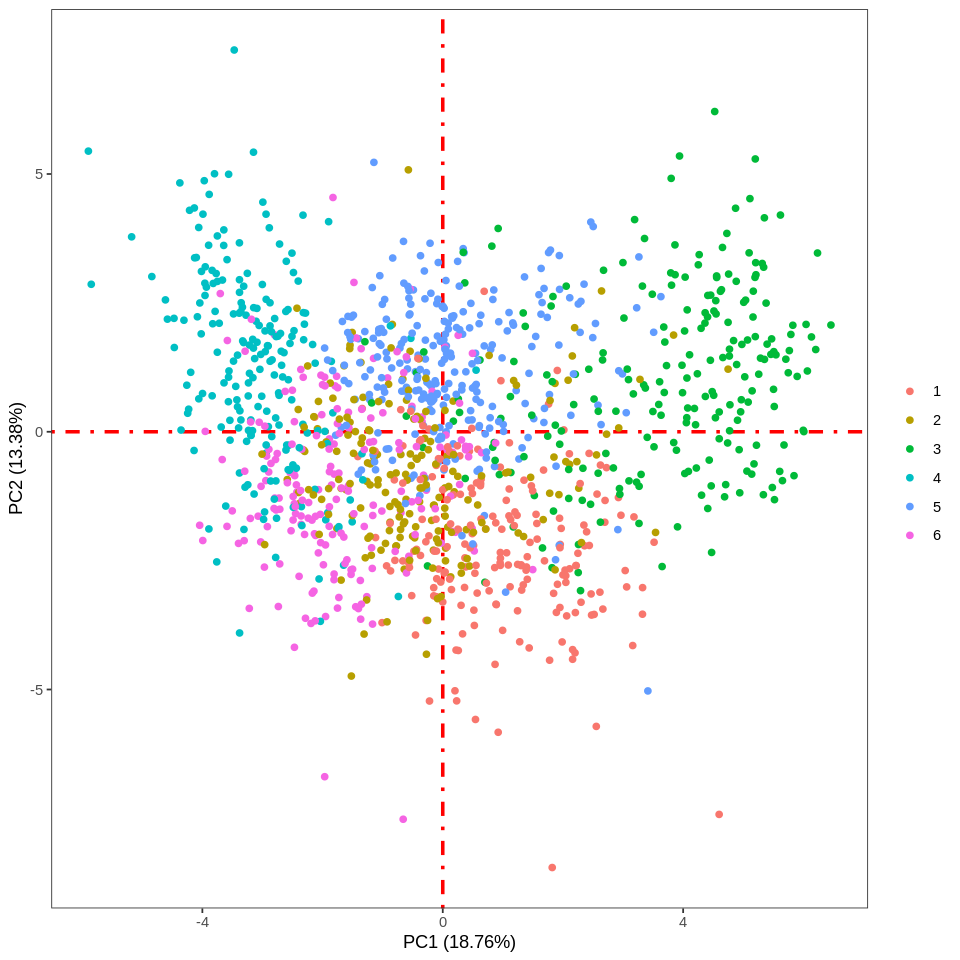

In [ ]:
rexposome::plotPCA(exp_pca, set = "samples", phenotype = "h_cohort")

**PCA Interpretation - Cohort**

In the graph, we can see that the observations from the different cohorts largely overlap, but there are also areas where certain observations tend to cluster more densely. Although we see some clustering of observations, there is significant overlap between the points, **which could indicate that differences between cohorts are not the main sources of variation in this dataset**. This type of graph is useful for visualizing how samples relate to each other based on their variability and how they are distributed according to a category of interest, in this case, the cohort variable.



## **4.- Exposome Association Analysis** <a name="association"></a>
Once the variables of the exposome that we want to study have been explored and described, we can look at the association between some health outcome and the different exposures using different approaches such as those mentioned in the theoretical part.


### **4.1.- Exposome-Wide association analysis (ExWAS)**

The ExWAS method is an approach that allows us to work with high-dimensional data. This method tests the association of each exposure with the health outcome of interest, adjusting for confounding variables (but not for co-exposures), and also allows us to control for multiple testing. This method can be applied using the `rexposome::exwas` function.

In [ ]:
exwas <- rexposome::exwas(exp, formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None, family = "gaussian")
exwas

An object of class 'ExWAS'

       ~ hs_zbmi_who h_cohort + e3_sex_None + e3_yearbir_None 

Tested exposures:  32 
Threshold for effective tests (TEF):  2.58e-03 
 . Tests < TEF: 1 
Robust standar errors: Computed

In [ ]:
# We obtain the threshold for the effective number of tests (multiple testing): corrected p-value
rexposome::tef(exwas)

[1] 0.002578272

In [ ]:
rexposome::extract(exwas)

In [ ]:
exwas_result <- round(as.data.frame(extract(exwas)),6)
View(exwas_result)

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


In [ ]:
# We selected the exposures that have a p-value lower than the tef.
exwas_result[exwas_result$pvalue<tef(exwas),]

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


Using the `rexposome::plotExwas` function, we can visualize the results of the exwas using a Manhattan plot. This type of graph is particularly useful because it allows us to visualize the statistical association through the p-values ​​grouped by the different exposure families. It is important to mention that the Manhattan plot only shows the p-values; no metrics of the effect of the exposures are displayed.

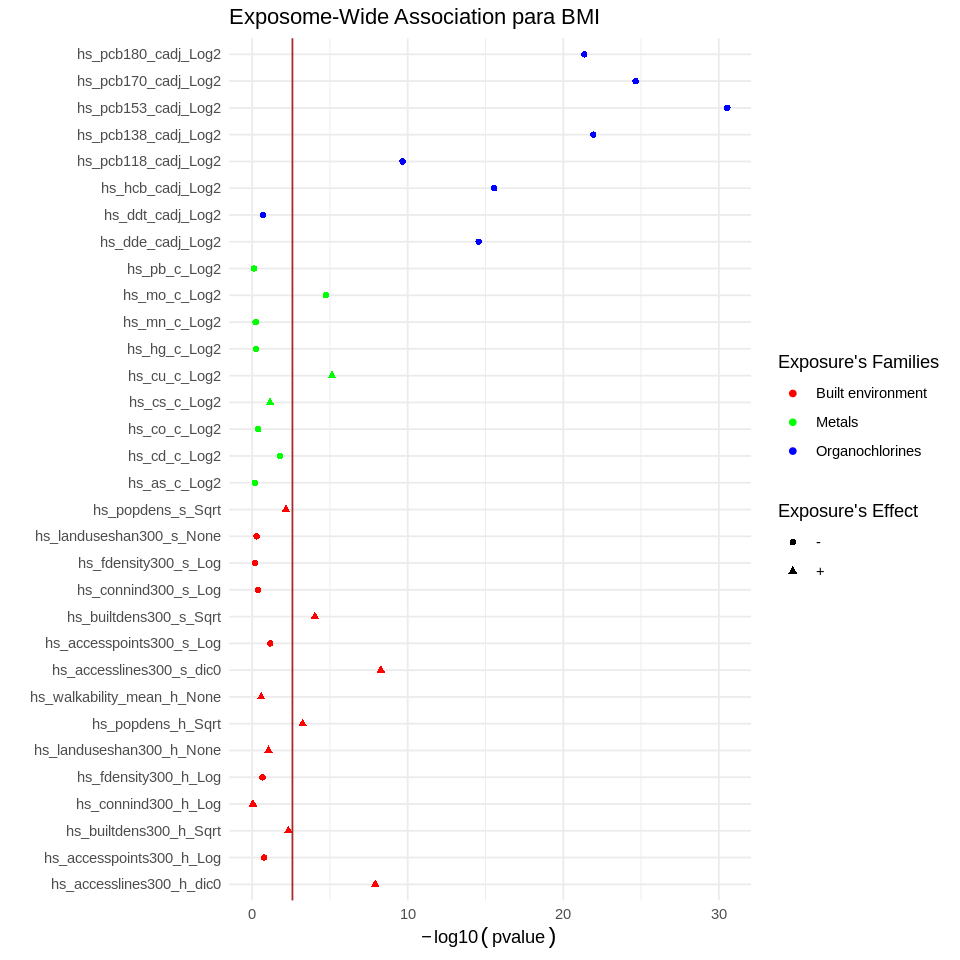

In [ ]:
clr <- rainbow(length(familyNames(exp)))
names(clr) <- familyNames(exp)

rexposome::plotExwas(exwas, color = clr, show.effective = TRUE,
          exp.order=expo.list) +
  ggtitle("Exposome-Wide Association para BMI")

* **Question 1:** <font color='green'> **Is the ExWas analysis controlled by multiple testing?** </font>




* **Question 2:** <font color='green'> **If a participant is exposed to PCB153, can we say that if they are also exposed to PCB118 their BMI will be reduced?** </font>


Using the `rexposome::plotEffect` function we can see the estimated effect for a given model, in this case the effect of postnatal exposures of the selected families (Built environment, Metals, Organochlorines) on BMI.

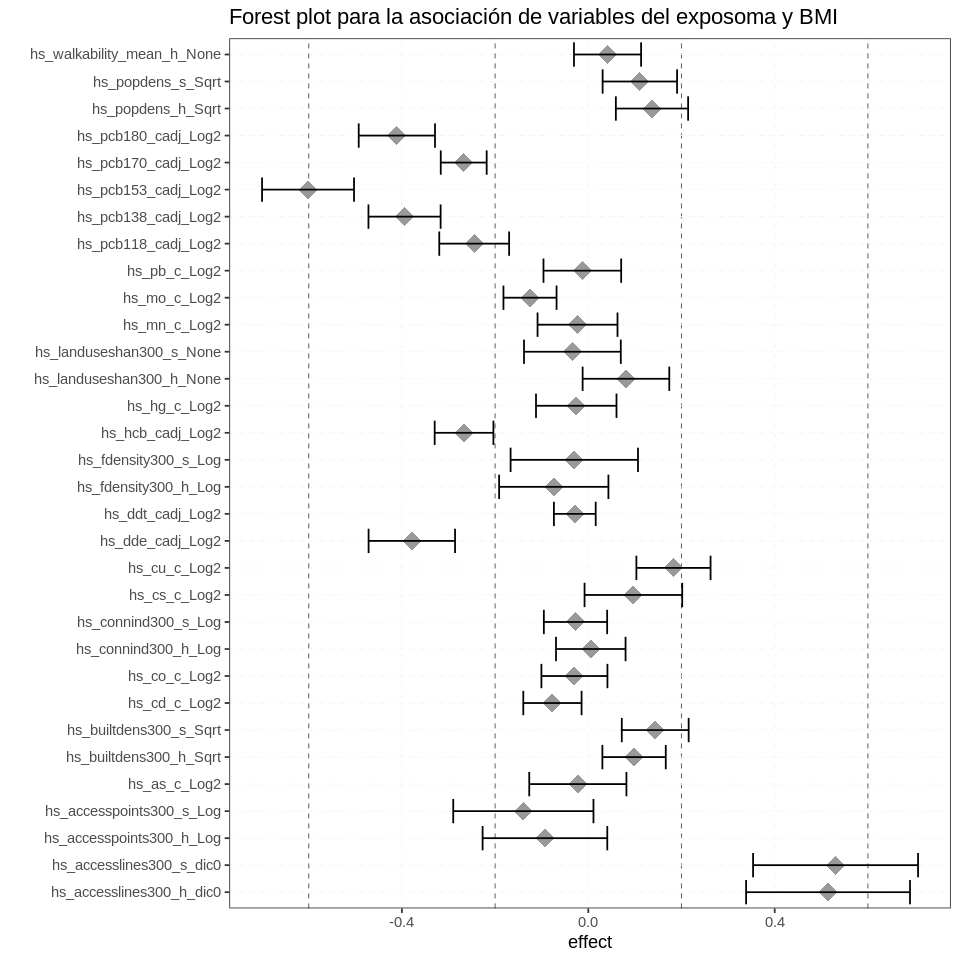

In [ ]:
rexposome::plotEffect(exwas) + ggtitle("Forest plot for the association of exposome variables and BMI")

Another way to visualize the ExWAS results is through a volcano plot. This type of graph is more illustrative because it combines the visualization techniques taught previously. It displays the p-value and effect size of different exposures on the studied health outcome (BMI). The volcano plot can be generated using the `rexposome::volcanoPlot` function.

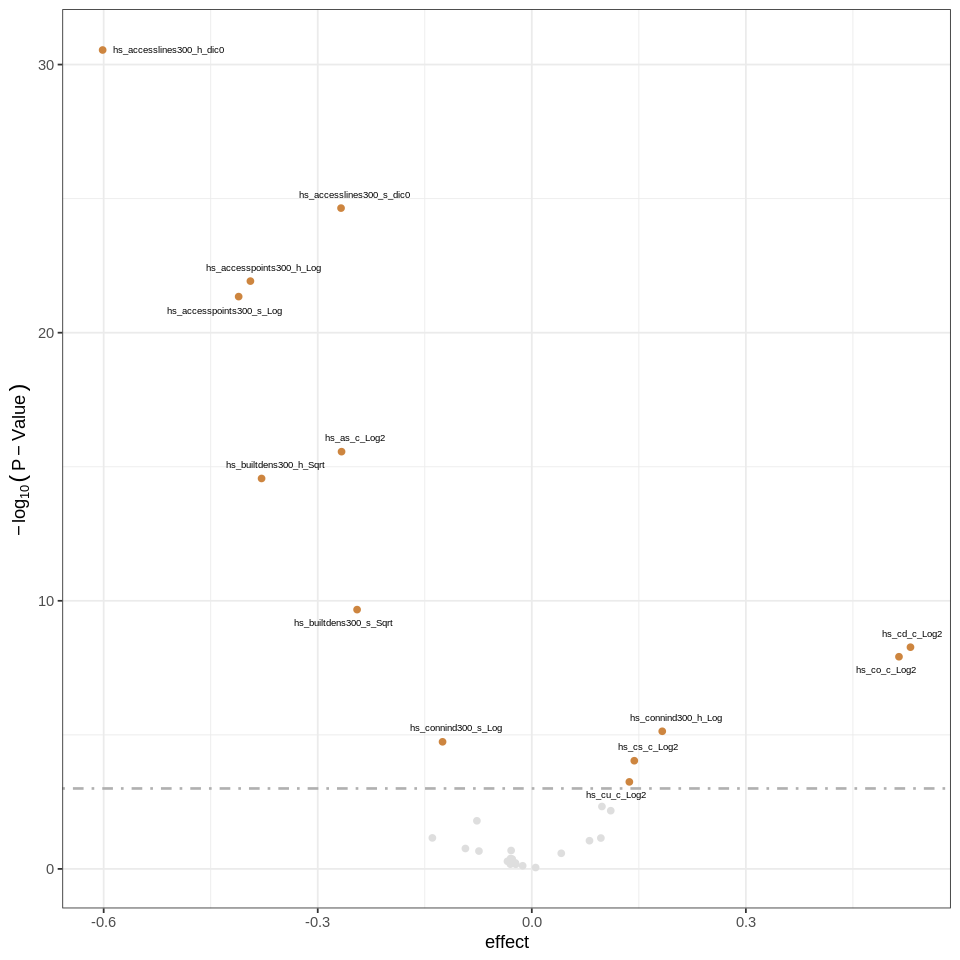

In [ ]:
rexposome::plotVolcano(exwas)

### **3.2.- Variable Selection Methods**
Variable selection techniques are generally performed automatically by algorithms (widely used in high-dimensional problems). In principle, these techniques allow us to discriminate those variables or exposures that are not associated with a health outcome. These variable selection methods are implemented in other libraries, some of which are: `Mass`, `Caret`, and `DSA`.




* **Stepwise selection:** This selection technique uses a sequence of steps to allow predictor variables to enter or exit a regression model one by one (generating multiple models). Often, this procedure converges on a subset of variables. The entry and exit criteria are commonly based on the significance of the p-value. The importance of the features is ranked according to their individual ability to explain the variation in the outcome.




In [ ]:
set.seed(234) # define seed
full.model <- lm(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                   hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                   hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                   hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                   hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                   hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                   hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                   hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                   hs_popdens_s_Sqrt + hs_as_c_Log2 +
                   hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                   hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                   hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                   hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                   hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                   hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                   hs_pcb180_cadj_Log2,
                 data = data)

In [ ]:
step.model <- stepAIC(full.model, direction = "both",
                      trace = FALSE,
                      scope = list(lower = ~ h_cohort + e3_sex_None + e3_yearbir_None))

In [ ]:
# check the results
summary(step.model)


Call:
lm(formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None + 
    hs_fdensity300_h_Log + hs_popdens_h_Sqrt + hs_accesspoints300_s_Log + 
    hs_cs_c_Log2 + hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mo_c_Log2 + 
    hs_pb_c_Log2 + hs_dde_cadj_Log2 + hs_hcb_cadj_Log2 + hs_pcb118_cadj_Log2 + 
    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6604 -0.6715 -0.0348  0.6512  3.5459 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.63227    1.41767  -1.857 0.063576 .  
h_cohort2                 0.50608    0.29397   1.722 0.085391 .  
h_cohort3                 1.34331    0.22622   5.938 3.71e-09 ***
h_cohort4                 0.88197    0.16891   5.222 2.07e-07 ***
h_cohort5                 0.76452    0.21720   3.520 0.000447 ***
h_cohort6                 0.55264    0.16886   3.273 0.001094 ** 
e3_sex_Nonemale           0.19688    0.05866   3.356 0.000814 ***
e3_ye

* **Elastic net:** This technique combines the penalties of LASSO and Ridge to overcome some of their limitations. Because LASSO tends to select one variable from a group and ignore the rest when variables are correlated, and Ridge selects some variables with similar magnitudes, Elastic net offers a good compromise. The penalty parameters are optimized using cross-validation (which can lead to instability in the results).


In [ ]:
# We define the predictor variables of the model (basically all exposures and covariates)
x <- model.matrix(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                    hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                    hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                    hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                    hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                    hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                    hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                    hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                    hs_popdens_s_Sqrt + hs_as_c_Log2 +
                    hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                    hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                    hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                    hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                    hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                    hs_pcb180_cadj_Log2, data)[,-1]


In [ ]:
pen.fac <- c(rep(0,12),rep(1,ncol(x)-12))

In [ ]:
set.seed(123)
model <- train(x=x, y=data$hs_zbmi_who,
  method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10, penalty.factor=pen.fac
)


In [ ]:
# Best tuning parameter
model$bestTune

# Coefficient of the final model. You need
# to specify the best lambda
coef(model$finalModel, model$bestTune$lambda)

,alpha,lambda
,<dbl>,<dbl>
9,0.1,0.1284352


45 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                -2.2629389915
h_cohort2                   0.6122160028
h_cohort3                   1.3478411924
h_cohort4                   0.9999768034
h_cohort5                   0.7939952226
h_cohort6                   0.7135643495
e3_sex_Nonemale             0.1851492993
e3_yearbir_None2004        -0.2443820238
e3_yearbir_None2005        -0.1489583779
e3_yearbir_None2006        -0.1398704150
e3_yearbir_None2007         0.2171047737
e3_yearbir_None2008         0.3210794845
e3_yearbir_None2009         0.6322938405
hs_accesslines300_h_dic0    .           
hs_accesspoints300_h_Log   -0.0039204657
hs_builtdens300_h_Sqrt      .           
hs_connind300_h_Log         .           
hs_fdensity300_h_Log       -0.0201272364
hs_landuseshan300_h_None   -0.0066952763
hs_popdens_h_Sqrt           0.0689061184
hs_walkability_mean_h_None -0.0045176735
hs_accesslines300_s_dic0    .           
hs_accesspoints

Variables that have a dot (.) instead of a coefficient have been excluded by the method; these coefficients have been reduced to zero and are not part of the final model. This indicates that, according to the model, they do not provide information that significantly improves the model's predictive power given the current regularization parameters and the information contained in the other variables.